In [ ]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
import tensorflow as tf
from keras import losses

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


In [ ]:
input_shape = (28, 28, 1)

In [ ]:
x_train = x_train/ 255
x_test = x_test / 255
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [ ]:
model_1 = keras.Sequential([
  keras.Input(shape= input_shape),
  Conv2D(256, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
  MaxPooling2D( (2,2), strides = 1),
  # Conv2D(128, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
  # MaxPooling2D( (2,2), strides = 2),
  # Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
  # MaxPooling2D( (2,2), strides = 1),
  # Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
  # MaxPooling2D( (2,2), strides = 2),
  Flatten(), # перевод в одномерный массив
  # Dense(500, activation = 'sigmoid'),
  # Dense(500, activation = 'sigmoid'),
  # Dense(250, activation = 'sigmoid'),
  # Dense(50, activation = 'sigmoid'),
  Dense(10, activation = 'softmax')
  ] )

In [ ]:
model_1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['Precision'])

In [ ]:
%%time

history = model_1.fit(x_train, y_train_cat, batch_size = 32, epochs=10, validation_data =(x_test, y_test_cat) )


Epoch 1/10
1875/1875 [==============================] - 358s 189ms/step - loss: 0.3528 - precision: 0.9008 - val_loss: 0.2922 - val_precision: 0.9125
Epoch 2/10
1875/1875 [==============================] - 326s 174ms/step - loss: 0.2455 - precision: 0.9253 - val_loss: 0.3040 - val_precision: 0.9050
Epoch 3/10
1875/1875 [==============================] - 318s 169ms/step - loss: 0.2025 - precision: 0.9364 - val_loss: 0.2694 - val_precision: 0.9204
Epoch 4/10
1875/1875 [==============================] - 312s 166ms/step - loss: 0.1696 - precision: 0.9453 - val_loss: 0.2812 - val_precision: 0.9124
Epoch 5/10
1875/1875 [==============================] - 319s 170ms/step - loss: 0.1450 - precision: 0.9520 - val_loss: 0.2845 - val_precision: 0.9157
Epoch 6/10
1875/1875 [==============================] - 330s 176ms/step - loss: 0.1253 - precision: 0.9595 - val_loss: 0.2992 - val_precision: 0.9166
Epoch 7/10
1875/1875 [==============================] - 310s 165ms/step - loss: 0.1093 - precision: 

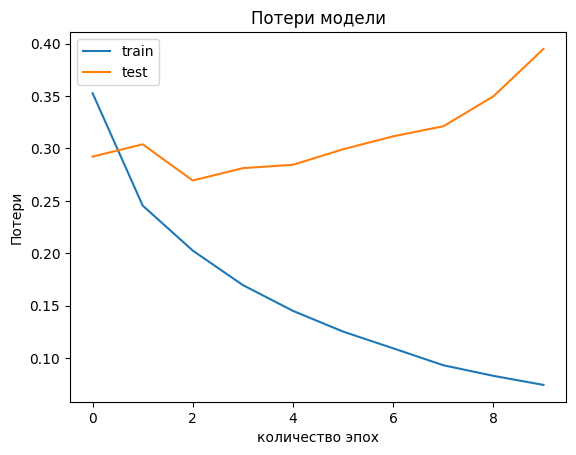

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

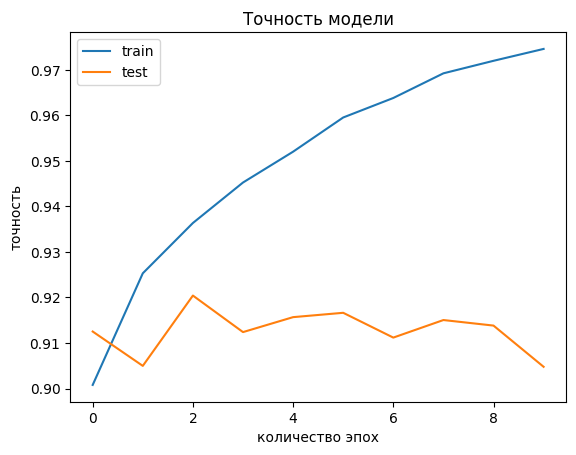

In [ ]:
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['Recall'])

In [ ]:
%%time

history = model_1.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_data =(x_test, y_test_cat) )

Epoch 1/10
1875/1875 [==============================] - 308s 164ms/step - loss: 0.0691 - recall: 0.9740 - val_loss: 0.4267 - val_recall: 0.8879
Epoch 2/10
1875/1875 [==============================] - 316s 169ms/step - loss: 0.0585 - recall: 0.9780 - val_loss: 0.3904 - val_recall: 0.9046
Epoch 3/10
1875/1875 [==============================] - 305s 163ms/step - loss: 0.0519 - recall: 0.9807 - val_loss: 0.4273 - val_recall: 0.9063
Epoch 4/10
1875/1875 [==============================] - 309s 165ms/step - loss: 0.0472 - recall: 0.9818 - val_loss: 0.4346 - val_recall: 0.9057
Epoch 5/10
1875/1875 [==============================] - 299s 159ms/step - loss: 0.0423 - recall: 0.9849 - val_loss: 0.4535 - val_recall: 0.9022
Epoch 6/10
1875/1875 [==============================] - 317s 169ms/step - loss: 0.0382 - recall: 0.9859 - val_loss: 0.4868 - val_recall: 0.9017
Epoch 7/10
1875/1875 [==============================] - 301s 160ms/step - loss: 0.0370 - recall: 0.9871 - val_loss: 0.5114 - val_recall:

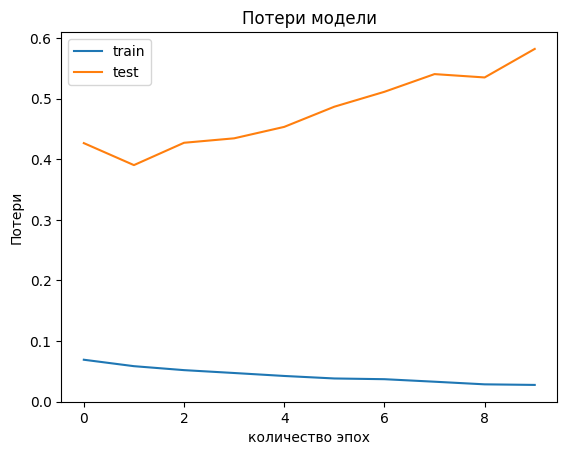

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

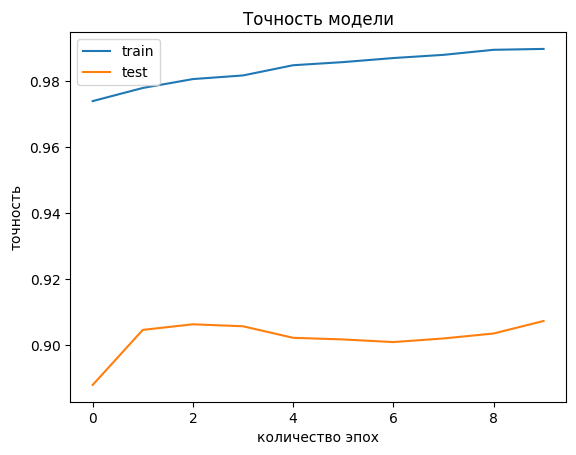

In [ ]:
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_1.evaluate(x_test, y_test_cat)

313/313 [==============================] - 8s 27ms/step - loss: 0.5822 - recall: 0.9073


[0.5822136998176575, 0.9072999954223633]

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 256)       2560      
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 256)       0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 10)                1866250   
                                                                 
Total params: 1868810 (7.13 MB)
Trainable params: 1868810 (7.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


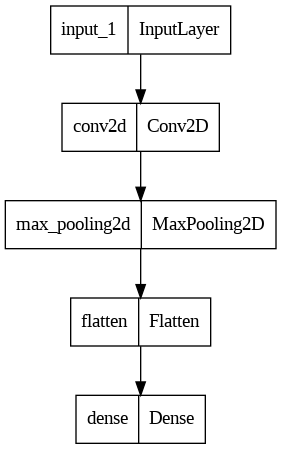

In [ ]:
keras.utils.plot_model(model_1)

Вывод: Модель переобучаеттся, т.к. ошибка резко растет.